In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

# Ruta a tu archivo
ruta_archivo = "data/dirty_cafe_sales.csv"
df = pd.read_csv(ruta_archivo)

In [127]:
# Ahora 'display' está definido y mostrará el DataFrame en formato HTML/tabular.
display(df.head()) 

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [129]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


Comprobar outliers y valores nulos /n
valores de location
Items que hay
Valores de precio por unidad ¿float o enteros?
Que items son los que mas se han venido y cuales son los que han supuesto mayor ganancias

In [130]:
df["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [131]:
#Se unifican los valores
valores_a_buscar = ['ERROR', 'UNKNOWN', 'nan'] 
mascara_texto = df[df['Item'].isin(valores_a_buscar)]
df['Item'] = df['Item'].replace(valores_a_buscar, np.nan)

In [132]:
df = df.replace(
    to_replace=valores_a_buscar,
    value = np.nan,
    regex=False
)

In [133]:
# Definir la lista de valores de texto que queremos contar
valores_a_contar = [
    'error', 'Error', 'ERROR', 
    'unknown', 'Unknown', 'UNKNOWN',
    'NaN', 'NAN', 'N/A', '',
]

def contar_valores_especificos(columna: pd.Series, valores: list) -> dict:
    """
    Cuenta la frecuencia de aparición de cada valor de la lista en una columna.
    """
    # Convertir a mayúsculas para conteo insensible a mayúsculas/minúsculas
    columna_upper = columna.astype(str).str.upper()
    valores_upper = [v.upper() for v in valores]
    
    # Crear un diccionario para almacenar los conteos
    conteo_detallado = {}
    
    for valor_upper in valores_upper:
        # Contar cuántas veces aparece ese valor específico
        conteo = (columna_upper == valor_upper).sum()
        if conteo > 0:
            # Almacenar el conteo usando el valor en MAYÚSCULAS como clave
            conteo_detallado[valor_upper] = conteo
            
    return conteo_detallado

# 1. Aplicar la función de conteo a cada columna del DataFrame
# Esto devuelve una Serie donde cada elemento es un diccionario de conteos para esa columna
serie_conteo = df.apply(
    lambda col: contar_valores_especificos(col, valores_a_contar)
)

# 2. Convertir la Serie de diccionarios resultante en un DataFrame
# Esto "expande" los diccionarios, creando las filas con los valores problemáticos
matriz_frecuencia = pd.DataFrame(serie_conteo.tolist(), index=serie_conteo.index).fillna(0).astype(int)

# Transponer la matriz para que las columnas del DF original sean columnas y los valores problemáticos sean filas
matriz_frecuencia = matriz_frecuencia.T

print("--- Matriz de Frecuencia Detallada de Valores Problemáticos ---")
print("Filas = Valores Problemáticos encontrados (en mayúsculas)")
print("Columnas = Columnas del DataFrame original")
display(matriz_frecuencia)

--- Matriz de Frecuencia Detallada de Valores Problemáticos ---
Filas = Valores Problemáticos encontrados (en mayúsculas)
Columnas = Columnas del DataFrame original


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
NAN,0,969,479,533,502,3178,3961,460


In [134]:
recuento = df["Item"].value_counts(ascending=False)

In [135]:
# 1. Definir las columnas a convertir
columnas_numericas = ['Quantity', 'Total Spent', 'Price Per Unit'] 

# 2.
df[columnas_numericas] = df[columnas_numericas].apply(
    pd.to_numeric, 
    errors='coerce' # Convierte cualquier cadena o error a np.nan
)

In [136]:
df["Transaction Date"] = df["Transaction Date"]. apply(
    pd.to_datetime,
    errors='coerce'
)

df[["Location", "Item", "Payment Method"]] = df[["Location", "Item", "Payment Method"]].astype(pd.StringDtype)

C:\Users\javie\AppData\Local\Temp\ipykernel_6768\3588101434.py:6: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  df[["Location", "Item", "Payment Method"]] = df[["Location", "Item", "Payment Method"]].astype(pd.StringDtype)


In [137]:
# Comprobacion de filas duplicadas
filas_duplicadas = df.duplicated()
total_duplicidades = filas_duplicadas.sum()
print(total_duplicidades)

0


In [138]:


valores_unicos = df.groupby("Item")["Price Per Unit"].agg(lambda x: x.unique().tolist())
print(valores_unicos)

#Rellenar valores de items
diccionario_items = {"Cake":3.0, "Coffee": 2.0,"Cookie": 1.0, "Juice": 3.0, "Salad": 5.0, "Sandwich": 4.0, "Smoothie": 4.0, "Tea":1.5 }
print(diccionario_items)
df["Price Per Unit"] = df["Item"].map(diccionario_items)

Item
Cake        [3.0, nan]
Coffee      [2.0, nan]
Cookie      [1.0, nan]
Juice       [3.0, nan]
Salad       [5.0, nan]
Sandwich    [4.0, nan]
Smoothie    [4.0, nan]
Tea         [1.5, nan]
Name: Price Per Unit, dtype: object
{'Cake': 3.0, 'Coffee': 2.0, 'Cookie': 1.0, 'Juice': 3.0, 'Salad': 5.0, 'Sandwich': 4.0, 'Smoothie': 4.0, 'Tea': 1.5}


In [139]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9521.000000,9031.000000,9498.000000,9540
mean,3.028463,2.949120,8.924352,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.419007,1.279313,6.009919,NaN


In [140]:
df["Transaction Date"].unique()

<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-01-20 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 366, dtype: datetime64[ns]

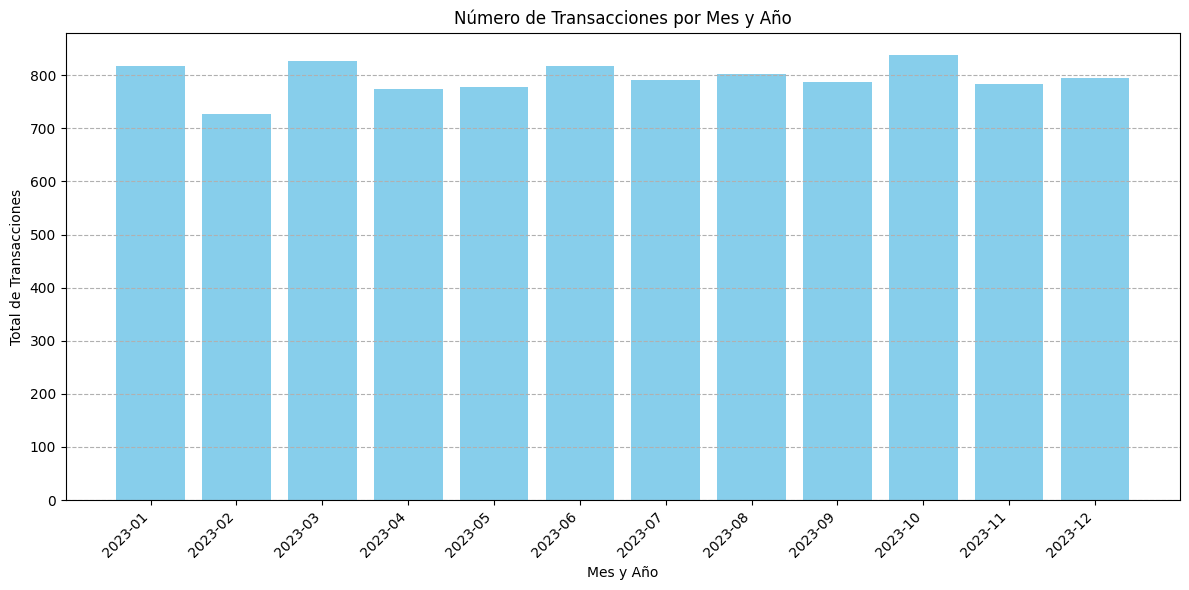

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

COLUMNA_FECHA = 'Transaction Date' 

df['Mes_Año'] = df[COLUMNA_FECHA].dt.to_period('M')
conteo_mensual = df.groupby('Mes_Año').size()
conteo_mensual.index = conteo_mensual.index.astype(str)


# --- VISUALIZACIÓN ---

plt.figure(figsize=(12, 6)) # Define el tamaño de la gráfica
plt.bar(
    conteo_mensual.index,    # Eje X: Los meses (ej. '2024-01', '2024-02')
    conteo_mensual.values,   # Eje Y: El número de transacciones
    color='skyblue'
)

# Añadir etiquetas y títulos
plt.title('Número de Transacciones por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Transacciones')

# Rotar las etiquetas del eje X para evitar que se superpongan si hay muchos meses
plt.xticks(rotation=45, ha='right')

# Añadir una cuadrícula para facilitar la lectura
plt.grid(axis='y', linestyle='--')

# Ajustar los márgenes para que todo quepa
plt.tight_layout() 

# Mostrar la gráfica
plt.show()